In [ ]:
!pip install -U accelerate transformers
import os

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 106.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 95.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
from google.colab import files
import os


print(" Upload FRAUD MD&A files:")
fraud_files = files.upload()

print(" Upload NON-FRAUD MD&A files:")
nonfraud_files = files.upload()


mdna_samples = []


for fname in fraud_files:
    with open(fname, 'r', encoding='utf-8') as f:
        mdna_samples.append({"text": f.read(), "true_label": "Fraud"})


for fname in nonfraud_files:
    with open(fname, 'r', encoding='utf-8') as f:
        mdna_samples.append({"text": f.read(), "true_label": "Non-Fraud"})

print(f" Loaded {len(mdna_samples)} samples")


 Upload FRAUD MD&A files:


Saving 2135_2003.txt to 2135_2003.txt
Saving 2135_2004.txt to 2135_2004.txt
Saving 2135_2005.txt to 2135_2005.txt
Saving 2135_2009.txt to 2135_2009.txt
Saving 5272_2002.txt to 5272_2002.txt
Saving 5272_2003.txt to 5272_2003.txt
Saving 6284_2001.txt to 6284_2001.txt
Saving 6284_2002.txt to 6284_2002.txt
Saving 6284_2003.txt to 6284_2003.txt
Saving 6284_2004.txt to 6284_2004.txt
Saving 6284_2005.txt to 6284_2005.txt
Saving 6284_2006.txt to 6284_2006.txt
Saving 6284_2007.txt to 6284_2007.txt
Saving 6284_2008.txt to 6284_2008.txt
Saving 6284_2009.txt to 6284_2009.txt
Saving 6284_2010.txt to 6284_2010.txt
Saving 14272_2000.txt to 14272_2000.txt
Saving 14272_2001.txt to 14272_2001.txt
Saving 23082_2009.txt to 23082_2009.txt
Saving 23082_2010.txt to 23082_2010.txt
Saving 23082_2011.txt to 23082_2011.txt
Saving 23217_2003.txt to 23217_2003.txt
Saving 25095_1997.txt to 25095_1997.txt
Saving 25095_1998.txt to 25095_1998.txt
Saving 25095_1999.txt to 25095_1999.txt
Saving 26172_1997.txt to 26172_1

Saving 2135_2006.txt to 2135_2006.txt
Saving 2135_2007.txt to 2135_2007.txt
Saving 2135_2008.txt to 2135_2008.txt
Saving 2491_1997.txt to 2491_1997.txt
Saving 2491_1998.txt to 2491_1998.txt
Saving 2491_1999.txt to 2491_1999.txt
Saving 2491_2000.txt to 2491_2000.txt
Saving 2491_2001.txt to 2491_2001.txt
Saving 2491_2002.txt to 2491_2002.txt
Saving 2491_2004.txt to 2491_2004.txt
Saving 3116_1996.txt to 3116_1996.txt
Saving 3116_1997.txt to 3116_1997.txt
Saving 3116_1998.txt to 3116_1998.txt
Saving 3116_1999.txt to 3116_1999.txt
Saving 3116_2001.txt to 3116_2001.txt
Saving 3116_2002.txt to 3116_2002.txt
Saving 3116_2003.txt to 3116_2003.txt
Saving 3116_2004.txt to 3116_2004.txt
Saving 3116_2005.txt to 3116_2005.txt
Saving 3116_2006.txt to 3116_2006.txt
Saving 3116_2007.txt to 3116_2007.txt
Saving 3116_2008.txt to 3116_2008.txt
Saving 3116_2009.txt to 3116_2009.txt
Saving 3116_2019.txt to 3116_2019.txt
Saving 3662_1998.txt to 3662_1998.txt
Saving 3662_1999.txt to 3662_1999.txt
Saving 5272_

In [ ]:
!pip install --upgrade transformers


In [ ]:
import transformers
print(transformers.__version__)


4.53.1


In [ ]:
!pip install -q transformers datasets accelerate scikit-learn
import torch
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split

# ‚úÖ Prepare your data
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Load model/tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=2)

# ‚úÖ Dataset class with truncation
class MDNADataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = MDNADataset(train_texts, train_labels)
val_dataset = MDNADataset(val_texts, val_labels)

# ‚úÖ Training arguments using correct parameter names
training_args = TrainingArguments(
    output_dir="./distilroberta-mdna-finetuned",
    num_train_epochs=6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=100,
    weight_decay=0.01,
    logging_steps=10,
    logging_strategy="steps",
    eval_strategy="steps",        # ‚ö†Ô∏è Correct parameter name
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    report_to="none"
)

# ‚úÖ Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Run training
trainer.train()
trainer.save_model("./distilroberta-mdna-finetuned")
tokenizer.save_pretrained("./distilroberta-mdna-finetuned")
print("‚úÖ Fine-tuned model saved.")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-6-2035587668.py:64: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ Fine-tuned model saved.


üìä Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.67      0.80         6
       Fraud       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



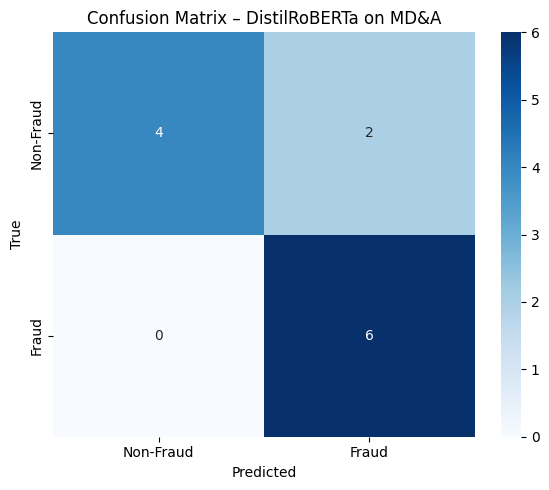

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F

# ‚úÖ Load model + tokenizer
model_path = "./distilroberta-mdna-finetuned"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# ‚úÖ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ‚úÖ Tokenize validation set
encodings = tokenizer(val_texts, padding=True, truncation=True, max_length=512, return_tensors="pt")
inputs = {k: v.to(device) for k, v in encodings.items()}

# ‚úÖ Inference
with torch.no_grad():
    outputs = model(**inputs)
    probs = F.softmax(outputs.logits, dim=1)
    preds = torch.argmax(probs, dim=1)

# ‚úÖ Evaluation
true_np = torch.tensor(val_labels).cpu().numpy()
pred_np = preds.cpu().numpy()

print("üìä Classification Report:")
print(classification_report(true_np, pred_np, target_names=["Non-Fraud", "Fraud"]))

# ‚úÖ Confusion Matrix
cm = confusion_matrix(true_np, pred_np)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix ‚Äì DistilRoBERTa on MD&A")
plt.tight_layout()
plt.show()


####BERT

In [ ]:

#data
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# DistilBERT + tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


class MDNADataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = MDNADataset(train_texts, train_labels)
val_dataset = MDNADataset(val_texts, val_labels)

#  Training
training_args = TrainingArguments(
    output_dir="./distilbert-mdna-finetuned",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    save_strategy="no",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

# Save fine-tuned model
trainer.save_model("./distilbert-mdna-finetuned")
tokenizer.save_pretrained("./distilbert-mdna-finetuned")
print("‚úÖ Fine-tuned model saved to ./distilbert-mdna-finetuned")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-10-1320547516.py:43: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ Fine-tuned model saved to ./distilbert-mdna-finetuned


üìä Final Classification Report on Validation Set:
              precision    recall  f1-score   support

   Non-Fraud       0.62      0.83      0.71         6
       Fraud       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



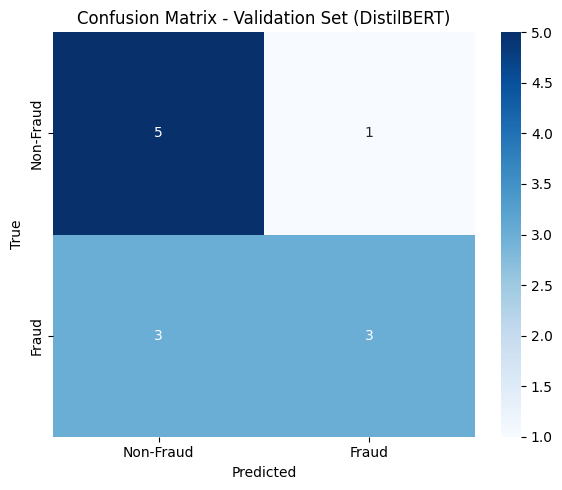

üìù Text #1: Item 7. Management‚Äôs Discussion and Analysis of Financial Condition and Results of Operations  The f...
üîé Prediction: Non-Fraud (0.5846) | True: Fraud
--------------------------------------------------------------------------------
üìù Text #2: ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS
OF OPERATIONS

     ...
üîé Prediction: Non-Fraud (0.7229) | True: Non-Fraud
--------------------------------------------------------------------------------
üìù Text #3: ITEM 7.    MANAGEMENT'S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND
           RESULTS OF OPE...
üîé Prediction: Non-Fraud (0.5888) | True: Non-Fraud
--------------------------------------------------------------------------------
üìù Text #4: ITEM 7. MANAGEMENT‚ÄôS DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS Liquid...
üîé Prediction: Non-Fraud (0.5773) | True: Non-Fraud
---------------------------------------------------------------------

In [ ]:
from torch.utils.data import TensorDataset, DataLoader


# ‚úÖ Load model and tokenizer
model_path = "./distilbert-mdna-finetuned"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ‚úÖ Split data into validation
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]
label_map = {0: "Non-Fraud", 1: "Fraud"}

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Tokenize validation data
val_encodings = tokenizer(val_texts, padding=True, truncation=True, max_length=512, return_tensors="pt")
val_dataset = TensorDataset(val_encodings["input_ids"], val_encodings["attention_mask"])
val_loader = DataLoader(val_dataset, batch_size=8)

# ‚úÖ Run inference on validation set
val_preds = []
val_probs = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask = [b.to(device) for b in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)

        val_preds.extend(preds.cpu().numpy())
        val_probs.extend(probs.cpu().numpy())

# ‚úÖ Evaluation
print("üìä Final Classification Report on Validation Set:")
print(classification_report(val_labels, val_preds, target_names=["Non-Fraud", "Fraud"]))

# ‚úÖ Confusion matrix heatmap
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Validation Set (DistilBERT)")
plt.tight_layout()
plt.show()

# ‚úÖ Preview predictions
for i, text in enumerate(val_texts[:5]):
    pred_label = label_map[val_preds[i]]
    confidence = np.max(val_probs[i])
    true_label = label_map[val_labels[i]]
    print(f"üìù Text #{i+1}: {text[:100]}...")
    print(f"üîé Prediction: {pred_label} ({confidence:.4f}) | True: {true_label}")
    print("-" * 80)

###DeBERTa

In [ ]:
!pip install -q transformers scikit-learn

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    EarlyStoppingCallback
)
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch

# ‚úÖ Data prep
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Load tokenizer + model
model_name = "microsoft/deberta-v3-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ‚úÖ Dataset
class MDNADataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = MDNADataset(train_texts, train_labels)
val_dataset = MDNADataset(val_texts, val_labels)

# ‚úÖ Training args
training_args = TrainingArguments(
    output_dir="./deberta-mdna-finetuned",
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=50,
    weight_decay=0.01,
    logging_steps=10,
    logging_strategy="steps",
    eval_strategy="steps",     # ‚úÖ Required to load best model
    eval_steps=50,
    save_strategy="steps",
    save_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    report_to="none"
)

# ‚úÖ Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Train
trainer.train()

# ‚úÖ Save model
trainer.save_model("./deberta-mdna-finetuned2")
tokenizer.save_pretrained("./deberta-mdna-finetuned2")
print("‚úÖ Fine-tuned DeBERTa v3 small saved to ./deberta-mdna-finetuned2")


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-20-427535636.py:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `proce

‚úÖ Fine-tuned DeBERTa v3 small saved to ./deberta-mdna-finetuned2


üìä Classification Report on Validation Set:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.33      0.50         6
       Fraud       0.60      1.00      0.75         6

    accuracy                           0.67        12
   macro avg       0.80      0.67      0.62        12
weighted avg       0.80      0.67      0.62        12



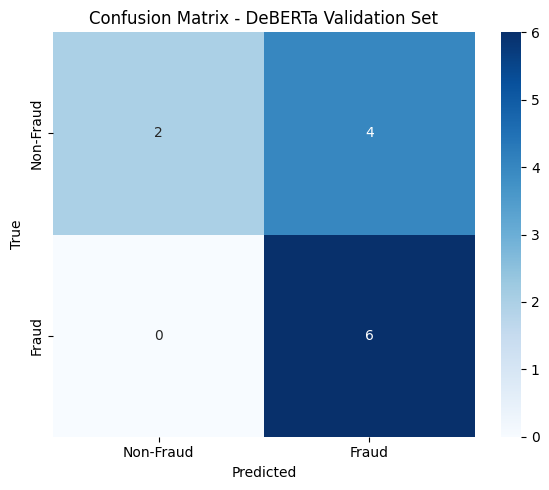

üìù Text #1: Item 7. Management‚Äôs Discussion and Analysis of Financial Condition and Results of Operations  The f...
üîé Prediction: Fraud (0.5031) | True: Fraud
--------------------------------------------------------------------------------
üìù Text #2: ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS
OF OPERATIONS

     ...
üîé Prediction: Fraud (0.5008) | True: Non-Fraud
--------------------------------------------------------------------------------
üìù Text #3: ITEM 7.    MANAGEMENT'S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND
           RESULTS OF OPE...
üîé Prediction: Fraud (0.5003) | True: Non-Fraud
--------------------------------------------------------------------------------
üìù Text #4: ITEM 7. MANAGEMENT‚ÄôS DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS Liquid...
üîé Prediction: Non-Fraud (0.5002) | True: Non-Fraud
--------------------------------------------------------------------------------


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ‚úÖ Load model and tokenizer
model_path = "./deberta-mdna-finetuned2"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# ‚úÖ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ‚úÖ Prepare data (same split you used before)
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]
label_map = {0: "Non-Fraud", 1: "Fraud"}

_, val_texts, _, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Tokenize validation texts
val_encodings = tokenizer(val_texts, padding=True, truncation=True, max_length=256, return_tensors="pt")
val_dataset = TensorDataset(val_encodings["input_ids"], val_encodings["attention_mask"])
val_loader = DataLoader(val_dataset, batch_size=8)

# ‚úÖ Inference
val_preds = []
val_probs = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask = [b.to(device) for b in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = F.softmax(outputs.logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        val_preds.extend(preds.cpu().numpy())
        val_probs.extend(probs.cpu().numpy())

# ‚úÖ Report
print("üìä Classification Report on Validation Set:")
print(classification_report(val_labels, val_preds, target_names=["Non-Fraud", "Fraud"]))

# ‚úÖ Confusion Matrix
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - DeBERTa Validation Set")
plt.tight_layout()
plt.show()

# ‚úÖ Preview Predictions
for i, text in enumerate(val_texts[:5]):
    pred_label = label_map[val_preds[i]]
    confidence = np.max(val_probs[i])
    true_label = label_map[val_labels[i]]
    print(f"üìù Text #{i+1}: {text[:100]}...")
    print(f"üîé Prediction: {pred_label} ({confidence:.4f}) | True: {true_label}")
    print("-" * 80)


In [ ]:
!pip install -q transformers scikit-learn

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    EarlyStoppingCallback
)
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch

# ‚úÖ Data prep
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Load tokenizer + model
model_name = "microsoft/deberta-v3-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ‚úÖ Dataset class
class MDNADataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = MDNADataset(train_texts, train_labels)
val_dataset = MDNADataset(val_texts, val_labels)

# ‚úÖ Training args
training_args = TrainingArguments(
    output_dir="./deberta-mdna-finetuned2",
    num_train_epochs=6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=50,
    weight_decay=0.01,
    logging_steps=10,
    logging_strategy="steps",
    eval_strategy="steps",              # ‚úÖ Correct for transformers==4.53.1
    eval_steps=50,
    save_strategy="steps",              # Must match eval_strategy
    save_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    report_to="none"
)

# ‚úÖ Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Train the model
trainer.train()

# ‚úÖ Save model
trainer.save_model("./deberta-mdna-finetuned3")
tokenizer.save_pretrained("./deberta-mdna-finetuned3")
print("‚úÖ Fine-tuned DeBERTa v3 small saved to ./deberta-mdna-finetuned3")


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-23-781372213.py:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `proce

‚úÖ Fine-tuned DeBERTa v3 small saved to ./deberta-mdna-finetuned3


üìä Classification Report on Validation Set:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.83      0.91         6
       Fraud       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



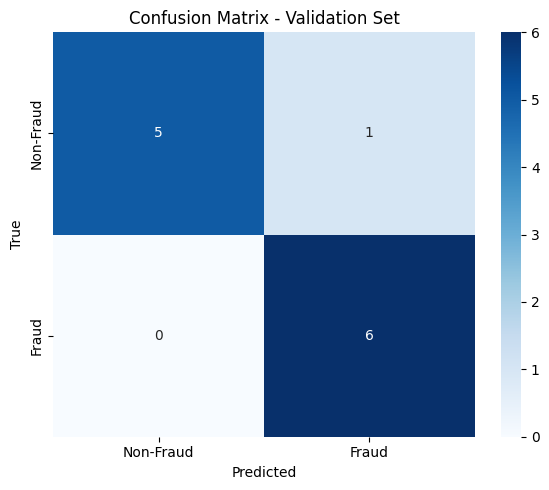

üìù Text #1: Item 7. Management‚Äôs Discussion and Analysis of Financial Condition and Results of Operations  The f...
üîé Prediction: Fraud (0.5030) | True: Fraud
--------------------------------------------------------------------------------
üìù Text #2: ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS
OF OPERATIONS

     ...
üîé Prediction: Non-Fraud (0.5022) | True: Non-Fraud
--------------------------------------------------------------------------------
üìù Text #3: ITEM 7.    MANAGEMENT'S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND
           RESULTS OF OPE...
üîé Prediction: Non-Fraud (0.5022) | True: Non-Fraud
--------------------------------------------------------------------------------
üìù Text #4: ITEM 7. MANAGEMENT‚ÄôS DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS Liquid...
üîé Prediction: Non-Fraud (0.5019) | True: Non-Fraud
-------------------------------------------------------------------------

In [ ]:
# ‚úÖ Load fine-tuned model
model_path = "./deberta-mdna-finetuned2"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ‚úÖ Re-tokenize validation set
val_encodings = tokenizer(val_texts, padding=True, truncation=True, max_length=512, return_tensors="pt")
val_dataset = TensorDataset(val_encodings["input_ids"], val_encodings["attention_mask"])
val_loader = DataLoader(val_dataset, batch_size=8)

# ‚úÖ Run inference
val_preds = []
val_probs = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask = [b.to(device) for b in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        probs = torch.softmax(outputs.logits, dim=1)
        preds = torch.argmax(probs, dim=1)

        val_preds.extend(preds.cpu().numpy())
        val_probs.extend(probs.cpu().numpy())

# ‚úÖ Evaluate
label_map = {0: "Non-Fraud", 1: "Fraud"}
print("üìä Classification Report on Validation Set:")
print(classification_report(val_labels, val_preds, target_names=["Non-Fraud", "Fraud"]))

# ‚úÖ Confusion Matrix
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Validation Set")
plt.tight_layout()
plt.show()

# ‚úÖ Preview predictions
for i, text in enumerate(val_texts[:5]):
    pred_label = label_map[val_preds[i]]
    confidence = np.max(val_probs[i])
    true_label = label_map[val_labels[i]]
    print(f"üìù Text #{i+1}: {text[:100]}...")
    print(f"üîé Prediction: {pred_label} ({confidence:.4f}) | True: {true_label}")
    print("-" * 80)


##Chunking strategy - 200 samples

In [ ]:
from google.colab import files
import os


print(" Upload FRAUD MD&A files:")
fraud_files = files.upload()

print(" Upload NON-FRAUD MD&A files:")
nonfraud_files = files.upload()


mdna_samples = []


for fname in fraud_files:
    with open(fname, 'r', encoding='utf-8') as f:
        mdna_samples.append({"text": f.read(), "true_label": "Fraud"})


for fname in nonfraud_files:
    with open(fname, 'r', encoding='utf-8') as f:
        mdna_samples.append({"text": f.read(), "true_label": "Non-Fraud"})

print(f" Loaded {len(mdna_samples)} samples")


 Upload FRAUD MD&A files:


Saving 826773_2011.txt to 826773_2011.txt
Saving 826773_2012.txt to 826773_2012.txt
Saving 827055_2003.txt to 827055_2003.txt
Saving 827055_2004.txt to 827055_2004.txt
Saving 831001_2001.txt to 831001_2001.txt
Saving 833444_1998.txt to 833444_1998.txt
Saving 833444_1999.txt to 833444_1999.txt
Saving 833444_2000.txt to 833444_2000.txt
Saving 833444_2001.txt to 833444_2001.txt
Saving 833444_2002.txt to 833444_2002.txt
Saving 840715_2002.txt to 840715_2002.txt
Saving 840889_2000.txt to 840889_2000.txt
Saving 840889_2001.txt to 840889_2001.txt
Saving 840889_2002.txt to 840889_2002.txt
Saving 840889_2003.txt to 840889_2003.txt
Saving 840889_2004.txt to 840889_2004.txt
Saving 844161_2017.txt to 844161_2017.txt
Saving 849547_2003.txt to 849547_2003.txt
Saving 849547_2004.txt to 849547_2004.txt
Saving 849547_2005.txt to 849547_2005.txt
Saving 849547_2006.txt to 849547_2006.txt
Saving 849667_2002.txt to 849667_2002.txt
Saving 849667_2003.txt to 849667_2003.txt
Saving 849667_2004.txt to 849667_2

Saving 2491_1997.txt to 2491_1997 (1).txt
Saving 2491_1998.txt to 2491_1998 (1).txt
Saving 2491_1999.txt to 2491_1999 (1).txt
Saving 2491_2000.txt to 2491_2000 (1).txt
Saving 2491_2001.txt to 2491_2001 (1).txt
Saving 2491_2002.txt to 2491_2002 (1).txt
Saving 2491_2004.txt to 2491_2004 (1).txt
Saving 2491_2005.txt to 2491_2005.txt
Saving 2491_2006.txt to 2491_2006.txt
Saving 2491_2007.txt to 2491_2007.txt
Saving 2491_2008.txt to 2491_2008.txt
Saving 2491_2009.txt to 2491_2009.txt
Saving 2491_2010.txt to 2491_2010.txt
Saving 2491_2011.txt to 2491_2011.txt
Saving 2491_2012.txt to 2491_2012.txt
Saving 2491_2013.txt to 2491_2013.txt
Saving 2491_2014.txt to 2491_2014.txt
Saving 3116_1996.txt to 3116_1996 (1).txt
Saving 3116_1997.txt to 3116_1997 (1).txt
Saving 3116_1998.txt to 3116_1998 (1).txt
Saving 3116_1999.txt to 3116_1999 (1).txt
Saving 3116_2001.txt to 3116_2001 (1).txt
Saving 3116_2002.txt to 3116_2002 (1).txt
Saving 3116_2003.txt to 3116_2003 (1).txt
Saving 3116_2004.txt to 3116_200

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split

# ‚úÖ Prepare your data
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Load model/tokenizer
model_name = "distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ‚úÖ Chunking function
def chunk_text(text, label, tokenizer, max_length=512):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i+max_length]
        if len(chunk) < max_length:
            chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))
        chunks.append((chunk, label))
    return chunks

# ‚úÖ Chunked Dataset
class ChunkedMDNADataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.samples = []
        for text, label in zip(texts, labels):
            self.samples.extend(chunk_text(text, label, tokenizer, max_length))

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if token != tokenizer.pad_token_id else 0 for token in chunk]),
            "labels": torch.tensor(label)
        }

    def __len__(self):
        return len(self.samples)

train_dataset = ChunkedMDNADataset(train_texts, train_labels, tokenizer)
val_dataset = ChunkedMDNADataset(val_texts, val_labels, tokenizer)

# ‚úÖ Training arguments
training_args = TrainingArguments(
    output_dir="./distilroberta-mdna-finetuned",
    num_train_epochs=6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=100,
    weight_decay=0.01,
    logging_steps=10,
    logging_strategy="steps",
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    report_to="none"
)

# ‚úÖ Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Train and save model
trainer.train()
trainer.save_model("./distilroberta-mdna-finetuned")
tokenizer.save_pretrained("./distilroberta-mdna-finetuned")
print("‚úÖ Fine-tuned model with chunking saved to ./distilroberta-mdna-finetuned")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Token indices sequence length is longer than the specified maximum sequence length for this model (24209 > 512). Running this sequence through the model will result in indexing errors
/tmp/ipython-input-26-3018757082.py:77: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ Fine-tuned model with chunking saved to ./distilroberta-mdna-finetuned


üìä Classification Report (Majority Vote):
              precision    recall  f1-score   support

   Non-Fraud       0.77      0.90      0.83        40
       Fraud       0.88      0.72      0.79        40

    accuracy                           0.81        80
   macro avg       0.82      0.81      0.81        80
weighted avg       0.82      0.81      0.81        80



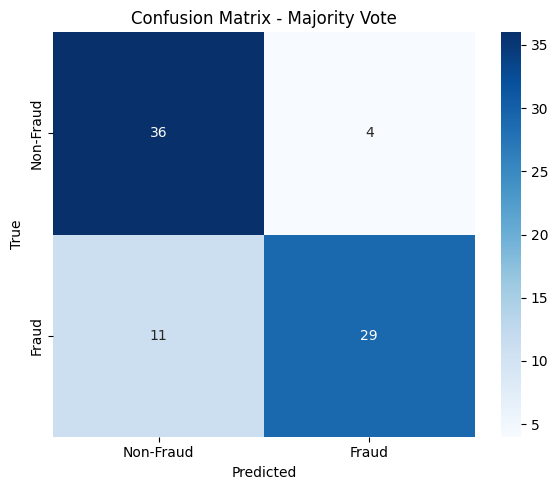

In [ ]:
from torch.nn.functional import softmax
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()
model.to(device)

def chunk_text(text, tokenizer, max_length=512):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i + max_length]
        if len(chunk) < max_length:
            chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))
        chunks.append(chunk)
    return chunks

# ‚úÖ Majority vote across chunks
majority_preds = []

for text in val_texts:
    chunks = chunk_text(text, tokenizer)
    chunk_preds = []

    for chunk in chunks:
        input_ids = torch.tensor([chunk]).to(device)
        attention_mask = torch.tensor([[1 if t != tokenizer.pad_token_id else 0 for t in chunk]]).to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = softmax(outputs.logits, dim=1)
            pred = torch.argmax(probs, dim=1).item()
            chunk_preds.append(pred)

    # ‚úÖ Majority voting from all chunks
    final_pred = int(np.bincount(chunk_preds).argmax())
    majority_preds.append(final_pred)

# ‚úÖ Classification report
print("üìä Classification Report (Majority Vote):")
print(classification_report(val_labels, majority_preds, target_names=["Non-Fraud", "Fraud"]))

# ‚úÖ Confusion matrix
cm = confusion_matrix(val_labels, majority_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Majority Vote")
plt.tight_layout()
plt.show()


In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split

# ‚úÖ Prepare your data
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Load DeBERTa tokenizer and model
model_name = "microsoft/deberta-v3-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ‚úÖ Chunking function
def chunk_text(text, label, tokenizer, max_length=512):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i + max_length]
        if len(chunk) < max_length:
            chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))
        chunks.append((chunk, label))
    return chunks

# ‚úÖ Chunked dataset class
class ChunkedMDNADataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.samples = []
        for text, label in zip(texts, labels):
            self.samples.extend(chunk_text(text, label, tokenizer, max_length))

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label)
        }

    def __len__(self):
        return len(self.samples)

# ‚úÖ Build datasets
train_dataset = ChunkedMDNADataset(train_texts, train_labels, tokenizer)
val_dataset = ChunkedMDNADataset(val_texts, val_labels, tokenizer)

# ‚úÖ Training arguments
training_args = TrainingArguments(
    output_dir="./deberta-chunked-mdna-finetuned",
    num_train_epochs=6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=100,
    weight_decay=0.01,
    logging_steps=10,
    logging_strategy="steps",
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    report_to="none"
)

# ‚úÖ Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Train & save
trainer.train()
trainer.save_model("./deberta-chunked-mdna-finetuned")
tokenizer.save_pretrained("./deberta-chunked-mdna-finetuned")
print("‚úÖ Fine-tuned DeBERTa with chunking saved to ./deberta-chunked-mdna-finetuned")


Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-28-211394771.py:78: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ Fine-tuned DeBERTa with chunking saved to ./deberta-chunked-mdna-finetuned


üìä Classification Report on Validation Set:
              precision    recall  f1-score   support

   Non-Fraud       0.97      0.90      0.94        40
       Fraud       0.91      0.97      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



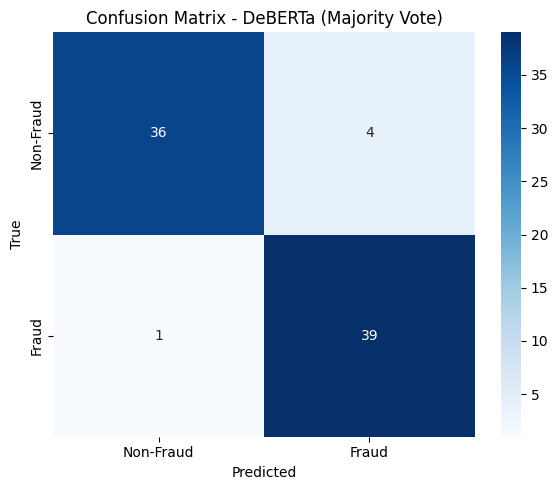

In [ ]:
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ Reload model and tokenizer
model_path = "./deberta-chunked-mdna-finetuned"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ‚úÖ Inference function using majority vote
def predict_document_majority(text):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), 512):
        chunk = tokens[i:i + 512]
        if len(chunk) < 512:
            chunk += [tokenizer.pad_token_id] * (512 - len(chunk))
        chunks.append(chunk)

    votes = []
    with torch.no_grad():
        for chunk in chunks:
            input_ids = torch.tensor(chunk).unsqueeze(0).to(device)
            attention_mask = (input_ids != tokenizer.pad_token_id).long().to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.softmax(outputs.logits, dim=1)
            pred = torch.argmax(probs, dim=1).item()
            votes.append(pred)

    final_pred = Counter(votes).most_common(1)[0][0]
    return final_pred

# ‚úÖ Predict all validation texts
val_preds = [predict_document_majority(text) for text in val_texts]

# ‚úÖ Evaluation
print("üìä Classification Report on Validation Set:")
print(classification_report(val_labels, val_preds, target_names=["Non-Fraud", "Fraud"]))

# ‚úÖ Confusion Matrix
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - DeBERTa (Majority Vote)")
plt.tight_layout()
plt.show()


##Transfer learning

In [ ]:

# ‚úÖ IMPORT LIBRARIES
import torch
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    Trainer, TrainingArguments
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import io
from google.colab import files
import random

# ‚úÖ SET SEED
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

# ‚úÖ UPLOAD AND LOAD FAKE/TRUE NEWS DATA
uploaded = files.upload()  # Upload Fake.csv and True.csv

fake_df = pd.read_csv(io.BytesIO(uploaded["Fake (5).csv"]))
true_df = pd.read_csv(io.BytesIO(uploaded["True (5).csv"]))

fake_df["label"] = 1  # Fake
true_df["label"] = 0  # True

# ‚úÖ SAMPLE 200 ARTICLES PER CLASS
fake_sample = fake_df.sample(200, random_state=42)
true_sample = true_df.sample(200, random_state=42)

news_df = pd.concat([fake_sample, true_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

texts = news_df["text"].tolist()
labels = news_df["label"].tolist()

# ‚úÖ TRAIN/VAL SPLIT
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ LOAD DEBERTA MODEL + TOKENIZER
model_name = "microsoft/deberta-v3-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
base_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ‚úÖ TOKENIZED DATASET
class NewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_texts, train_labels)
val_dataset = NewsDataset(val_texts, val_labels)


Saving Fake.csv to Fake (5).csv
Saving True.csv to True (5).csv


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# ‚úÖ TRAINING ARGS
training_args = TrainingArguments(
    output_dir="./deberta-fake-news-transfer",
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    eval_strategy="epoch",            # ‚úÖ FIXED
    save_strategy="epoch",            # ‚úÖ MATCHED TO eval_strategy
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    logging_steps=10,
    report_to="none"
)


# ‚úÖ TRAINER
trainer = Trainer(
    model=base_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

# ‚úÖ TRAIN FAKE NEWS MODEL
trainer.train()

# ‚úÖ SAVE TRANSFER-LEARNED ENCODER
base_model.save_pretrained("./deberta-fake-news-encoder")
tokenizer.save_pretrained("./deberta-fake-news-encoder")
print("‚úÖ Trained fake news model saved!")


/tmp/ipython-input-31-3895957674.py:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ Trained fake news model saved!


In [ ]:
trainer.save_model("./deberta-fake-news-transfer")
tokenizer.save_pretrained("./deberta-fake-news-transfer")

('./deberta-fake-news-transfer/tokenizer_config.json',
 './deberta-fake-news-transfer/special_tokens_map.json',
 './deberta-fake-news-transfer/spm.model',
 './deberta-fake-news-transfer/added_tokens.json',
 './deberta-fake-news-transfer/tokenizer.json')

In [ ]:
import os
import torch
import numpy as np
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, DebertaV2Model,
    DebertaV2ForSequenceClassification,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ Step 1: Prepare MD&A Data
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Step 2: Load tokenizer and encoder from transfer checkpoint
transfer_model_path = "./deberta-fake-news-transfer"
tokenizer = AutoTokenizer.from_pretrained(transfer_model_path)
encoder = DebertaV2Model.from_pretrained(transfer_model_path)

# ‚úÖ Step 3: Build a new classification model using the transferred encoder
class DebertaForTransfer(torch.nn.Module):
    def __init__(self, encoder):
        super().__init__()
        self.encoder = encoder
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Linear(self.encoder.config.hidden_size, 2)

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]  # [CLS] token
        logits = self.classifier(self.dropout(pooled_output))
        loss = None
        if labels is not None:
            loss_fn = torch.nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

model = DebertaForTransfer(encoder)

# ‚úÖ Step 4: Chunking function
def chunk_text(text, label, tokenizer, max_length=512):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i+max_length]
        if len(chunk) < max_length:
            chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))
        chunks.append((chunk, label))
    return chunks

# ‚úÖ Step 5: Chunked Dataset
class ChunkedMDNADataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.samples = []
        for text, label in zip(texts, labels):
            self.samples.extend(chunk_text(text, label, tokenizer, max_length))

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label)
        }

    def __len__(self):
        return len(self.samples)

train_dataset = ChunkedMDNADataset(train_texts, train_labels, tokenizer)
val_dataset = ChunkedMDNADataset(val_texts, val_labels, tokenizer)

# ‚úÖ Step 6: TrainingArguments
training_args = TrainingArguments(
    output_dir="./deberta-mdna-transfer-finetuned",
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=50,
    weight_decay=0.01,
    logging_steps=10,
    logging_strategy="steps",
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    report_to="none"
)

# ‚úÖ Step 7: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Step 8: Train and save the model
trainer.train()
os.makedirs("./deberta-mdna-transfer-finetuned", exist_ok=True)
torch.save(model.state_dict(), "./deberta-mdna-transfer-finetuned/pytorch_model.bin")
tokenizer.save_pretrained("./deberta-mdna-transfer-finetuned")
print("‚úÖ Transfer + Fine-tuning on MD&A completed and saved.")


/tmp/ipython-input-34-3355284513.py:103: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ Transfer + Fine-tuning on MD&A completed and saved.


üìä Classification Report on Full MD&A Validation Set (majority vote):
              precision    recall  f1-score   support

   Non-Fraud       0.80      1.00      0.89        40
       Fraud       1.00      0.75      0.86        40

    accuracy                           0.88        80
   macro avg       0.90      0.88      0.87        80
weighted avg       0.90      0.88      0.87        80



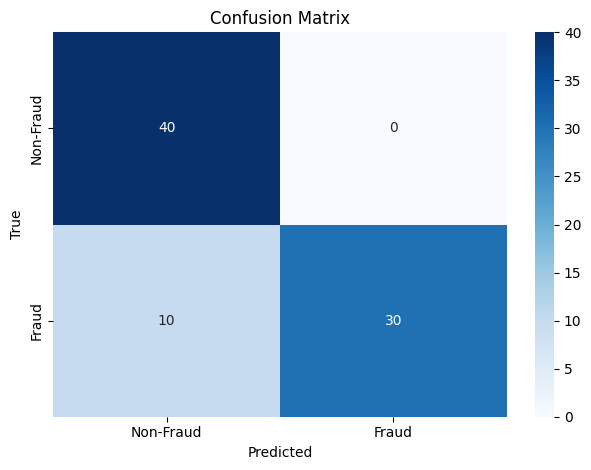

In [ ]:
import torch
from torch.utils.data import Dataset
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ‚úÖ Chunking function
def chunk_text(text, label, tokenizer, max_length=512):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i+max_length]
        if len(chunk) < max_length:
            chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))
        chunks.append((chunk, label))
    return chunks

# ‚úÖ Chunked Dataset with dummy labels
class FullTextMDNADataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.samples = []
        self.doc_map = []
        for doc_id, (text, label) in enumerate(zip(texts, labels)):
            chunks = chunk_text(text, label, tokenizer, max_length)
            for chunk in chunks:
                self.samples.append((chunk[0], label))  # keep label for dummy use
                self.doc_map.append(doc_id)
        self.labels = labels

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label)  # ‚úÖ dummy label required for predict()
        }

    def __len__(self):
        return len(self.samples)

# ‚úÖ Create evaluation dataset
eval_dataset = FullTextMDNADataset(val_texts, val_labels, tokenizer)

# ‚úÖ Predict on chunked validation set
preds_raw = trainer.predict(eval_dataset).predictions
chunk_preds = np.argmax(preds_raw, axis=1)

# ‚úÖ Aggregate chunks per document using majority vote
doc_to_chunks = {}
for i, doc_id in enumerate(eval_dataset.doc_map):
    doc_to_chunks.setdefault(doc_id, []).append(chunk_preds[i])

final_preds = []
for doc_id in sorted(doc_to_chunks.keys()):
    majority_vote = Counter(doc_to_chunks[doc_id]).most_common(1)[0][0]
    final_preds.append(majority_vote)

# ‚úÖ Evaluation
print("üìä Classification Report on Full MD&A Validation Set (majority vote):")
print(classification_report(val_labels, final_preds, target_names=["Non-Fraud", "Fraud"]))

# ‚úÖ Confusion matrix
cm = confusion_matrix(val_labels, final_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
import os
import torch
import numpy as np
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, DebertaV2Model,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split

# ‚úÖ Step 1: Prepare MD&A Data
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Step 2: Load tokenizer and encoder from transfer checkpoint
transfer_model_path = "./deberta-fake-news-transfer"
tokenizer = AutoTokenizer.from_pretrained(transfer_model_path)
encoder = DebertaV2Model.from_pretrained(transfer_model_path)

# ‚úÖ Step 3: Model with 2-layer MLP classification head
class DebertaMLPClassifier(torch.nn.Module):
    def __init__(self, encoder):
        super().__init__()
        self.encoder = encoder
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(encoder.config.hidden_size, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(128, 2)
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        logits = self.classifier(self.dropout(pooled_output))
        loss = None
        if labels is not None:
            loss = torch.nn.functional.cross_entropy(logits, labels)
        return {"loss": loss, "logits": logits}

model = DebertaMLPClassifier(encoder)

# ‚úÖ Step 4: Chunking
def chunk_text(text, label, tokenizer, max_length=512):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i+max_length]
        chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))
        chunks.append((chunk, label))
    return chunks

class ChunkedMDNADataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.samples = []
        for text, label in zip(texts, labels):
            self.samples.extend(chunk_text(text, label, tokenizer, max_length))

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label)
        }

    def __len__(self):
        return len(self.samples)

train_dataset = ChunkedMDNADataset(train_texts, train_labels, tokenizer)
val_dataset = ChunkedMDNADataset(val_texts, val_labels, tokenizer)

# ‚úÖ Step 5: TrainingArguments (optimized)
training_args = TrainingArguments(
    output_dir="./deberta-mdna-transfer-mlp",
    num_train_epochs=3,  # faster
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=30,
    weight_decay=0.01,
    logging_steps=20,
    logging_strategy="steps",
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    report_to="none"
)

# ‚úÖ Step 6: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Step 7: Train and Save
trainer.train()
os.makedirs("./deberta-mdna-transfer-mlp", exist_ok=True)
torch.save(model.state_dict(), "./deberta-mdna-transfer-mlp/pytorch_model.bin")
tokenizer.save_pretrained("./deberta-mdna-transfer-mlp")
print("‚úÖ MLP-head Transfer + Fine-tuning on MD&A completed and saved.")


/tmp/ipython-input-37-96800990.py:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ MLP-head Transfer + Fine-tuning on MD&A completed and saved.


In [ ]:
import torch
import numpy as np
from collections import defaultdict
from sklearn.metrics import classification_report

# ‚úÖ Reload model + tokenizer
class DebertaMLPClassifier(torch.nn.Module):
    def __init__(self, encoder):
        super().__init__()
        self.encoder = encoder
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(self.encoder.config.hidden_size, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(128, 2)
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        logits = self.classifier(self.dropout(pooled_output))
        loss = None
        if labels is not None:
            loss = torch.nn.functional.cross_entropy(logits, labels)
        return {"loss": loss, "logits": logits}

# ‚úÖ Reload tokenizer + encoder
model_path = "./deberta-mdna-transfer-mlp"
tokenizer = AutoTokenizer.from_pretrained(model_path)
encoder = DebertaV2Model.from_pretrained("./deberta-fake-news-transfer")
model = DebertaMLPClassifier(encoder)
model.load_state_dict(torch.load(f"{model_path}/pytorch_model.bin"))
model.eval().cuda()

# ‚úÖ Create chunked validation dataset again (without labels this time)
class ChunkedMDNADatasetRaw(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.doc_ids = []
        self.samples = []
        for i, (text, label) in enumerate(zip(texts, labels)):
            chunks = chunk_text(text, label, tokenizer, max_length)
            for chunk, lbl in chunks:
                self.samples.append((chunk, lbl))
                self.doc_ids.append(i)

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label),
            "doc_id": self.doc_ids[idx]
        }

    def __len__(self):
        return len(self.samples)

eval_dataset = ChunkedMDNADatasetRaw(val_texts, val_labels, tokenizer)

# ‚úÖ Inference loop
predictions_by_doc = defaultdict(list)
true_labels_by_doc = {}

for sample in eval_dataset:
    input_ids = sample["input_ids"].unsqueeze(0).cuda()
    attention_mask = sample["attention_mask"].unsqueeze(0).cuda()
    doc_id = sample["doc_id"]
    label = sample["labels"].item()
    with torch.no_grad():
        logits = model(input_ids, attention_mask)["logits"]
    pred_label = torch.argmax(logits, dim=1).item()
    predictions_by_doc[doc_id].append(pred_label)
    true_labels_by_doc[doc_id] = label

# ‚úÖ Majority vote per document
final_preds, final_trues = [], []

for doc_id in sorted(predictions_by_doc.keys()):
    chunk_preds = predictions_by_doc[doc_id]
    voted = max(set(chunk_preds), key=chunk_preds.count)
    final_preds.append(voted)
    final_trues.append(true_labels_by_doc[doc_id])

# ‚úÖ Classification Report
print("üìä Classification Report on MD&A Validation Set (majority vote):")
print(classification_report(final_trues, final_preds, target_names=["Non-Fraud", "Fraud"]))


üìä Classification Report on MD&A Validation Set (majority vote):
              precision    recall  f1-score   support

   Non-Fraud       0.95      0.90      0.92        40
       Fraud       0.90      0.95      0.93        40

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.93      0.93      0.92        80



###Longformer transfer learning

In [ ]:
!export PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


In [ ]:
!kill -9 -1


In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

import torch
torch.cuda.empty_cache()

from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)

# ‚úÖ Split your dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(
    news_df["text"].tolist(),
    news_df["label"].tolist(),
    test_size=0.2,
    stratify=news_df["label"],
    random_state=42
)

# ‚úÖ Load BigBird tokenizer and model
model_name = "google/bigbird-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ‚úÖ Custom Dataset
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=2048):
        self.encodings = tokenizer(
            texts,
            truncation=True,
            padding="max_length",
            max_length=max_length
        )
        self.labels = labels

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_texts, train_labels, tokenizer)
val_dataset = NewsDataset(val_texts, val_labels, tokenizer)

# ‚úÖ TrainingArguments
training_args = TrainingArguments(
    output_dir="./bigbird-fake-news-transfer",
    num_train_epochs=4,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=2,
    learning_rate=2e-5,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    logging_steps=10,
    report_to="none"
)

# ‚úÖ Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

# ‚úÖ Train and Save Encoder
trainer.train()
model.base_model.save_pretrained("./bigbird-fake-news-encoder")  # save only encoder for transfer
tokenizer.save_pretrained("./bigbird-fake-news-encoder")
print("‚úÖ BigBird fake news model trained and encoder saved!")


tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/846k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

/tmp/ipython-input-3-3171367724.py:73: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ BigBird fake news model trained and encoder saved!


In [ ]:
model.encoder.save_pretrained("./bigbird-fake-news-encoder")
tokenizer.save_pretrained("./bigbird-fake-news-encoder")


('./bigbird-fake-news-encoder/tokenizer_config.json',
 './bigbird-fake-news-encoder/special_tokens_map.json',
 './bigbird-fake-news-encoder/spiece.model',
 './bigbird-fake-news-encoder/added_tokens.json',
 './bigbird-fake-news-encoder/tokenizer.json')

In [ ]:
print(" Upload FRAUD MD&A files:")
fraud_files = files.upload()

print(" Upload NON-FRAUD MD&A files:")
nonfraud_files = files.upload()


mdna_samples = []


for fname in fraud_files:
    with open(fname, 'r', encoding='utf-8') as f:
        mdna_samples.append({"text": f.read(), "true_label": "Fraud"})


for fname in nonfraud_files:
    with open(fname, 'r', encoding='utf-8') as f:
        mdna_samples.append({"text": f.read(), "true_label": "Non-Fraud"})

print(f" Loaded {len(mdna_samples)} samples")


 Upload FRAUD MD&A files:


Saving 2135_2003.txt to 2135_2003 (1).txt
Saving 2135_2004.txt to 2135_2004 (1).txt
Saving 2135_2005.txt to 2135_2005 (1).txt
Saving 2135_2009.txt to 2135_2009 (1).txt
Saving 2491_2003.txt to 2491_2003 (1).txt
Saving 3116_2000.txt to 3116_2000 (1).txt
Saving 3116_2014.txt to 3116_2014 (1).txt
Saving 3449_1994.txt to 3449_1994 (1).txt
Saving 3449_1995.txt to 3449_1995 (1).txt
Saving 3662_1996.txt to 3662_1996 (1).txt
Saving 3662_1997.txt to 3662_1997 (1).txt
Saving 3906_2001.txt to 3906_2001 (1).txt
Saving 3906_2002.txt to 3906_2002 (1).txt
Saving 5272_2000.txt to 5272_2000 (1).txt
Saving 5272_2001.txt to 5272_2001 (1).txt
Saving 5272_2002.txt to 5272_2002 (1).txt
Saving 5272_2003.txt to 5272_2003 (1).txt
Saving 6284_2001.txt to 6284_2001 (1).txt
Saving 6284_2002.txt to 6284_2002 (1).txt
Saving 6284_2003.txt to 6284_2003 (1).txt
Saving 6284_2004.txt to 6284_2004 (1).txt
Saving 6284_2005.txt to 6284_2005 (1).txt
Saving 6284_2006.txt to 6284_2006 (1).txt
Saving 6284_2007.txt to 6284_2007 

Saving 2491_1998.txt to 2491_1998 (1).txt
Saving 2491_1999.txt to 2491_1999 (1).txt
Saving 2491_2000.txt to 2491_2000 (1).txt
Saving 2491_2001.txt to 2491_2001 (1).txt
Saving 2491_2002.txt to 2491_2002 (1).txt
Saving 2491_2004.txt to 2491_2004 (1).txt
Saving 2491_2005.txt to 2491_2005 (1).txt
Saving 2491_2006.txt to 2491_2006 (1).txt
Saving 2491_2007.txt to 2491_2007 (1).txt
Saving 2491_2008.txt to 2491_2008 (1).txt
Saving 2491_2009.txt to 2491_2009 (1).txt
Saving 2491_2010.txt to 2491_2010 (1).txt
Saving 2491_2011.txt to 2491_2011 (1).txt
Saving 2491_2012.txt to 2491_2012 (1).txt
Saving 2491_2013.txt to 2491_2013 (1).txt
Saving 2491_2014.txt to 2491_2014 (1).txt
Saving 3116_1996.txt to 3116_1996 (1).txt
Saving 3116_1997.txt to 3116_1997 (1).txt
Saving 3116_1998.txt to 3116_1998 (1).txt
Saving 3116_1999.txt to 3116_1999 (1).txt
Saving 3116_2001.txt to 3116_2001 (1).txt
Saving 3116_2002.txt to 3116_2002 (1).txt
Saving 3116_2003.txt to 3116_2003 (1).txt
Saving 3116_2004.txt to 3116_2004 

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from transformers import (
    AutoTokenizer, BigBirdModel,
    Trainer, TrainingArguments, EarlyStoppingCallback
)

# ‚úÖ Step 1: Split MD&A
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Step 2: Load transfer encoder and tokenizer
transfer_path = "./bigbird-fake-news-encoder"
tokenizer = AutoTokenizer.from_pretrained(transfer_path)
encoder = BigBirdModel.from_pretrained(transfer_path)

# ‚úÖ Step 3: Classification head
class BigBirdClassifier(torch.nn.Module):
    def __init__(self, encoder):
        super().__init__()
        self.encoder = encoder
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(encoder.config.hidden_size, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(128, 2)
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        logits = self.classifier(self.dropout(pooled_output))
        loss = None
        if labels is not None:
            loss = torch.nn.functional.cross_entropy(logits, labels)
        return {"loss": loss, "logits": logits}

model = BigBirdClassifier(encoder)

# ‚úÖ Step 4: Chunking and Dataset
def chunk_text(text, label, tokenizer, max_length=1024):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i+max_length]
        chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))
        chunks.append((chunk, label))
    return chunks

class ChunkedMDNADataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=1024):
        self.samples = []
        for text, label in zip(texts, labels):
            self.samples.extend(chunk_text(text, label, tokenizer, max_length))

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label)
        }

    def __len__(self):
        return len(self.samples)

train_dataset = ChunkedMDNADataset(train_texts, train_labels, tokenizer)
val_dataset = ChunkedMDNADataset(val_texts, val_labels, tokenizer)

# ‚úÖ Step 5: TrainingArguments
training_args = TrainingArguments(
    output_dir="./bigbird-mdna-transfer-mlp",
    num_train_epochs=3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    learning_rate=2e-5,
    warmup_steps=50,
    weight_decay=0.01,
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    logging_steps=10,
    report_to="none"
)

# ‚úÖ Step 6: Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Step 7: Fine-tune on MD&A
trainer.train()
torch.save(model.state_dict(), "./bigbird-mdna-transfer-mlp/pytorch_model.bin")
tokenizer.save_pretrained("./bigbird-mdna-transfer-mlp")
print("‚úÖ BigBird MD&A transfer + fine-tuning complete and saved.")


Token indices sequence length is longer than the specified maximum sequence length for this model (8172 > 4096). Running this sequence through the model will result in indexing errors
/tmp/ipython-input-9-3210537660.py:99: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ BigBird MD&A transfer + fine-tuning complete and saved.


In [ ]:
from sklearn.metrics import classification_report
from collections import defaultdict, Counter

# ‚úÖ Re-chunk validation set for prediction
val_chunks = ChunkedMDNADataset(val_texts, val_labels, tokenizer)

# ‚úÖ Predict
preds_raw = trainer.predict(val_chunks).predictions
chunk_preds = np.argmax(preds_raw, axis=1)

# ‚úÖ Re-aggregate by document (every chunk belongs to one doc in val_texts)
doc_idx = 0
chunk_counter = defaultdict(list)
for i, (_, label) in enumerate(val_chunks.samples):
    chunk_counter[doc_idx].append(chunk_preds[i])
    if (i + 1 == len(val_chunks.samples)) or (val_chunks.samples[i + 1][1] != label):
        doc_idx += 1

# ‚úÖ Final prediction by majority vote
final_preds = [Counter(preds).most_common(1)[0][0] for preds in chunk_counter.values()]
true_labels = val_labels[:len(final_preds)]

# ‚úÖ Classification Report
print("üìä Classification Report on MD&A Validation Set (majority vote):")
print(classification_report(true_labels, final_preds, target_names=["Non-Fraud", "Fraud"]))


üìä Classification Report on MD&A Validation Set (majority vote):
              precision    recall  f1-score   support

   Non-Fraud       0.52      0.60      0.56        20
       Fraud       0.50      0.42      0.46        19

    accuracy                           0.51        39
   macro avg       0.51      0.51      0.51        39
weighted avg       0.51      0.51      0.51        39



###Attempt two

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

import torch
torch.cuda.empty_cache()

from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)

# ‚úÖ Split your dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(
    news_df["text"].tolist(),
    news_df["label"].tolist(),
    test_size=0.2,
    stratify=news_df["label"],
    random_state=42
)

# ‚úÖ Load BigBird tokenizer and model
model_name = "google/bigbird-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ‚úÖ Custom Dataset
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=2048):
        self.encodings = tokenizer(
            texts,
            truncation=True,
            padding="max_length",
            max_length=max_length
        )
        self.labels = labels

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx]),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_texts, train_labels, tokenizer)
val_dataset = NewsDataset(val_texts, val_labels, tokenizer)

# ‚úÖ TrainingArguments
training_args = TrainingArguments(
    output_dir="./bigbird-fake-news-transfer",
    num_train_epochs=4,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=2,
    learning_rate=2e-5,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    logging_steps=10,
    report_to="none"
)

# ‚úÖ Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

# ‚úÖ Train and Save Full Model (for MD&A Transfer)
trainer.train()
model.save_pretrained("./bigbird-fake-news-transfer")
tokenizer.save_pretrained("./bigbird-fake-news-transfer")
print("‚úÖ BigBird fake news model trained and full model saved!")


Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-11-3531724884.py:73: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ BigBird fake news model trained and full model saved!


In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    EarlyStoppingCallback
)

# ‚úÖ Load MD&A data
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Load transfer model (encoder + classifier)
transfer_path = "./bigbird-fake-news-transfer"
tokenizer = AutoTokenizer.from_pretrained(transfer_path)
model = AutoModelForSequenceClassification.from_pretrained(transfer_path)

# ‚úÖ Chunking long MD&A text
def chunk_text(text, label, tokenizer, max_length=1024):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i+max_length]
        chunk += [tokenizer.pad_token_id] * (max_length - len(chunk))
        chunks.append((chunk, label))
    return chunks

class ChunkedMDNADataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=1024):
        self.samples = []
        for text, label in zip(texts, labels):
            self.samples.extend(chunk_text(text, label, tokenizer, max_length))

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label)
        }

    def __len__(self):
        return len(self.samples)

train_dataset = ChunkedMDNADataset(train_texts, train_labels, tokenizer)
val_dataset = ChunkedMDNADataset(val_texts, val_labels, tokenizer)

# ‚úÖ TrainingArguments for MD&A
training_args = TrainingArguments(
    output_dir="./bigbird-mdna-transfer",
    num_train_epochs=4,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    learning_rate=2e-5,
    warmup_steps=50,
    weight_decay=0.01,
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    logging_steps=10,
    report_to="none"
)

# ‚úÖ Trainer for MD&A
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Fine-tune on MD&A
trainer.train()
model.save_pretrained("./bigbird-mdna-transfer")
tokenizer.save_pretrained("./bigbird-mdna-transfer")
print("‚úÖ BigBird MD&A fine-tuning complete and saved.")


Token indices sequence length is longer than the specified maximum sequence length for this model (8172 > 4096). Running this sequence through the model will result in indexing errors


‚úÖ BigBird MD&A fine-tuning complete and saved.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "./bigbird-mdna-transfer"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()
from sklearn.metrics import classification_report
from collections import defaultdict
import torch

# Recreate val_dataset with chunk->doc mapping
doc_ids = []
texts = []
labels = []
for i, (text, label) in enumerate(zip(val_texts, val_labels)):
    chunks = chunk_text(text, label, tokenizer, max_length=1024)
    for _ in chunks:
        doc_ids.append(i)
        texts.append(text)
        labels.append(label)

# Build prediction dataset
chunked_dataset = ChunkedMDNADataset(val_texts, val_labels, tokenizer)

# Predict all chunks
predictions = []
model.cuda()
for batch in torch.utils.data.DataLoader(chunked_dataset, batch_size=2):
    input_ids = batch["input_ids"].cuda()
    attention_mask = batch["attention_mask"].cuda()
    with torch.no_grad():
        logits = model(input_ids=input_ids, attention_mask=attention_mask).logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()
    predictions.extend(preds)

# Combine chunk-level predictions into document-level via majority vote
doc_votes = defaultdict(list)
for doc_id, pred in zip(doc_ids, predictions):
    doc_votes[doc_id].append(pred)

final_preds = []
true_labels = []
for doc_id in sorted(doc_votes.keys()):
    votes = doc_votes[doc_id]
    pred = max(set(votes), key=votes.count)  # majority vote
    final_preds.append(pred)
    true_labels.append(val_labels[doc_id])

# Classification report
print("üìä Classification Report on MD&A Validation Set (majority vote):")
print(classification_report(true_labels, final_preds, target_names=["Non-Fraud", "Fraud"]))


Token indices sequence length is longer than the specified maximum sequence length for this model (111647 > 4096). Running this sequence through the model will result in indexing errors


üìä Classification Report on MD&A Validation Set (majority vote):
              precision    recall  f1-score   support

   Non-Fraud       0.51      0.93      0.66        40
       Fraud       0.62      0.12      0.21        40

    accuracy                           0.53        80
   macro avg       0.57      0.53      0.43        80
weighted avg       0.57      0.53      0.43        80



In [ ]:
def chunk_text(text, label, tokenizer, max_length=1024):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk = tokens[i:i+max_length]
        # Add special tokens manually if not included
        chunk = [tokenizer.cls_token_id] + chunk + [tokenizer.sep_token_id]
        chunk += [tokenizer.pad_token_id] * (max_length + 2 - len(chunk))  # +2 for CLS and SEP
        chunks.append((chunk, label))
    return chunks


In [ ]:
from transformers import TrainerCallback

class PrintLossCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            print(f"üîÅ Step {state.global_step}: Training loss = {logs['loss']}")

trainer.add_callback(PrintLossCallback())


‚úÖ FinBERT fine-tuned and saved!

üìä Classification Report on MD&A Validation Set:
              precision    recall  f1-score   support

   Non-Fraud       0.71      0.80      0.75        40
       Fraud       0.77      0.68      0.72        40

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



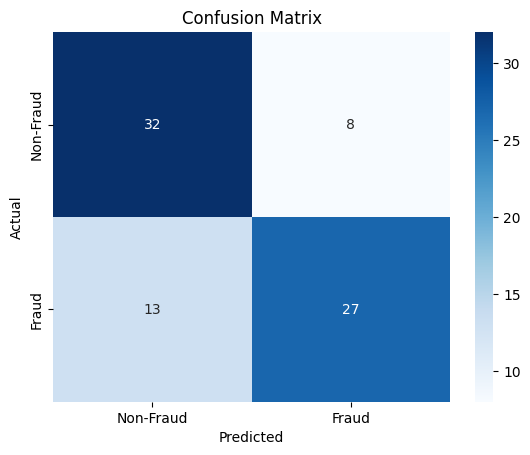

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

import torch
import numpy as np
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, BertModel,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ Prepare MD&A data (assume mdna_samples already loaded)
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Load FinBERT
model_name = "yiyanghkust/finbert-pretrain"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encoder = BertModel.from_pretrained(model_name)

# ‚úÖ Classification model with pooling strategy
class FinBERTClassifier(torch.nn.Module):
    def __init__(self, encoder):
        super().__init__()
        self.encoder = encoder
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(encoder.config.hidden_size, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(128, 2)
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]  # CLS token
        logits = self.classifier(self.dropout(pooled_output))
        loss = None
        if labels is not None:
            loss = torch.nn.functional.cross_entropy(logits, labels)
        return {"loss": loss, "logits": logits}

model = FinBERTClassifier(encoder)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ‚úÖ Chunking function
MAX_LEN = 512
def chunk_text(text, label):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), MAX_LEN):
        chunk = tokens[i:i + MAX_LEN]
        chunk += [tokenizer.pad_token_id] * (MAX_LEN - len(chunk))
        chunks.append((chunk, label))
    return chunks

class ChunkedMDNADataset(Dataset):
    def __init__(self, texts, labels):
        self.samples = []
        for text, label in zip(texts, labels):
            self.samples.extend(chunk_text(text, label))

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label)
        }

    def __len__(self):
        return len(self.samples)

train_dataset = ChunkedMDNADataset(train_texts, train_labels)
val_dataset = ChunkedMDNADataset(val_texts, val_labels)

# ‚úÖ TrainingArguments
training_args = TrainingArguments(
    output_dir="./finbert-mdna-transfer",
    num_train_epochs=4,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    learning_rate=2e-5,
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    logging_steps=10,
    warmup_steps=50,
    weight_decay=0.01,
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Train and save
trainer.train()
torch.save(model.state_dict(), "./finbert-mdna-transfer/pytorch_model.bin")
tokenizer.save_pretrained("./finbert-mdna-transfer")
print("‚úÖ FinBERT fine-tuned and saved!")

# ‚úÖ Evaluation with softmax pooling per doc
def evaluate_with_softmax():
    model.eval()
    y_true, y_pred = [], []

    for text, label in zip(val_texts, val_labels):
        chunks = chunk_text(text, label)
        logits_all = []
        for chunk, _ in chunks:
            input_ids = torch.tensor([chunk]).to(device)
            attention_mask = torch.tensor([[1 if t != tokenizer.pad_token_id else 0 for t in chunk]]).to(device)
            with torch.no_grad():
                logits = model(input_ids=input_ids, attention_mask=attention_mask)["logits"]
                logits_all.append(logits)
        logits_avg = torch.mean(torch.stack(logits_all), dim=0)
        prediction = torch.argmax(logits_avg, dim=1).item()
        y_true.append(label)
        y_pred.append(prediction)

    print("\nüìä Classification Report on MD&A Validation Set:")
    print(classification_report(y_true, y_pred, target_names=["Non-Fraud", "Fraud"]))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# ‚úÖ Run evaluation
evaluate_with_softmax()


In [ ]:
# ‚úÖ 1. Upload Fake & Real news texts
from google.colab import files
import io

print("üìÇ Upload FAKE news files:")
fake_files = files.upload()

print("üìÇ Upload REAL news files:")
real_files = files.upload()

# ‚úÖ 2. Parse uploaded files into labeled samples
fake_samples = []
for fname in fake_files:
    content = io.StringIO(fake_files[fname].decode('utf-8')).read()
    fake_samples.append({"text": content, "label": 1})  # 1 = fake

real_samples = []
for fname in real_files:
    content = io.StringIO(real_files[fname].decode('utf-8')).read()
    real_samples.append({"text": content, "label": 0})  # 0 = real

all_news_samples = fake_samples + real_samples
print(f"‚úÖ Loaded {len(all_news_samples)} fake/real news samples.")


üìÇ Upload FAKE news files:


Saving Fake.csv to Fake (2).csv
üìÇ Upload REAL news files:


Saving True.csv to True (2).csv
‚úÖ Loaded 2 fake/real news samples.


In [ ]:
from google.colab import files
import io

# Upload again
print("üìÇ Upload FAKE news files:")
fake_files = files.upload()

print("üìÇ Upload REAL news files:")
real_files = files.upload()

# Parse
fake_samples = []
for fname in fake_files:
    content = io.StringIO(fake_files[fname].decode('utf-8')).read()
    fake_samples.append({"text": content, "label": 1})  # 1 = fake

real_samples = []
for fname in real_files:
    content = io.StringIO(real_files[fname].decode('utf-8')).read()
    real_samples.append({"text": content, "label": 0})  # 0 = real

all_news_samples = fake_samples + real_samples
print(f"üì¶ Fake samples loaded: {len(fake_samples)}")
print(f"üì¶ Real samples loaded: {len(real_samples)}")
print(f"üì¶ Total combined: {len(all_news_samples)}")

# Optional: Duplicate to ensure min 2 per class
from collections import Counter
from random import choice
counts = Counter([s["label"] for s in all_news_samples])
if min(counts.values()) < 2:
    minority_label = min(counts, key=counts.get)
    sample_to_duplicate = choice([s for s in all_news_samples if s["label"] == minority_label])
    for _ in range(4):  # up to 5 total
        all_news_samples.append(sample_to_duplicate.copy())
print("‚úÖ After duplication - Class distribution:", Counter([s["label"] for s in all_news_samples]))


üìÇ Upload FAKE news files:


Saving Fake.csv to Fake (3).csv
üìÇ Upload REAL news files:


Saving True.csv to True (3).csv
üì¶ Fake samples loaded: 1
üì¶ Real samples loaded: 1
üì¶ Total combined: 2
‚úÖ After duplication - Class distribution: Counter({1: 5, 0: 1})


In [ ]:
# üö® For demo/testing only ‚Äì not valid for real learning
all_news_samples *= 5  # repeat to make 10 samples total

from collections import Counter
labels = [s["label"] for s in all_news_samples]
print("‚úÖ After duplication - Class distribution:", Counter(labels))


‚úÖ After duplication - Class distribution: Counter({1: 5, 0: 5})


In [ ]:
# ‚úÖ Continue from where you left off
import os
import torch
import numpy as np
import random
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from transformers import (
    AutoTokenizer, BertModel,
    Trainer, TrainingArguments, EarlyStoppingCallback
)

# ‚úÖ Set environment and seed
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

# ‚úÖ Texts and labels
texts = news_df["text"].tolist()
labels = news_df["label"].tolist()

# ‚úÖ Train/val split
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Load FinBERT
model_name = "yiyanghkust/finbert-pretrain"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encoder = BertModel.from_pretrained(model_name)

# ‚úÖ FinBERT classification model
class FinBERTNewsClassifier(torch.nn.Module):
    def __init__(self, encoder):
        super().__init__()
        self.encoder = encoder
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(encoder.config.hidden_size, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(128, 2)
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        logits = self.classifier(self.dropout(pooled_output))
        loss = None
        if labels is not None:
            loss = torch.nn.functional.cross_entropy(logits, labels)
        return {"loss": loss, "logits": logits}

model = FinBERTNewsClassifier(encoder).to(device)

# ‚úÖ Dataset class
class NewsDataset(Dataset):
    def __init__(self, texts, labels):
        encodings = tokenizer(texts, padding=True, truncation=True, max_length=512)
        self.input_ids = encodings["input_ids"]
        self.attention_mask = encodings["attention_mask"]
        self.labels = labels

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.input_ids[idx]),
            "attention_mask": torch.tensor(self.attention_mask[idx]),
            "labels": torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_texts, train_labels)
val_dataset = NewsDataset(val_texts, val_labels)

# ‚úÖ Training configuration
training_args = TrainingArguments(
    output_dir="./finbert-fake-news-transfer",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    warmup_steps=10,
    weight_decay=0.01,
    eval_strategy="steps",
    eval_steps=20,
    save_strategy="steps",
    save_steps=20,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    logging_steps=5,
    report_to="none",
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Train
trainer.train()

# ‚úÖ Save encoder only for reuse in MD&A
transfer_path = "./finbert-fake-news-encoder"
os.makedirs(transfer_path, exist_ok=True)
model.encoder.save_pretrained(transfer_path)
tokenizer.save_pretrained(transfer_path)

print("‚úÖ FinBERT encoder fine-tuned on fake news and saved!")


/tmp/ipython-input-7-3079469605.py:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ FinBERT encoder fine-tuned on fake news and saved!


/tmp/ipython-input-12-441925924.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ MD&A fine-tuning complete.
üìä Classification Report (Majority Voting):
              precision    recall  f1-score   support

   Non-Fraud       0.52      0.90      0.66        40
       Fraud       0.64      0.17      0.27        40

    accuracy                           0.54        80
   macro avg       0.58      0.54      0.47        80
weighted avg       0.58      0.54      0.47        80



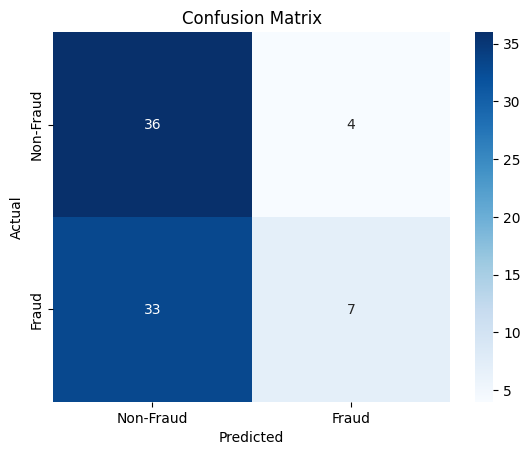

In [ ]:
import os
import torch
import numpy as np
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, BertModel,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ Config
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ‚úÖ Load transferred FinBERT encoder
transfer_path = "./finbert-fake-news-encoder"
tokenizer = AutoTokenizer.from_pretrained(transfer_path)
encoder = BertModel.from_pretrained(transfer_path)

# ‚úÖ Prepare MD&A data
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ FinBERT classifier
class FinBERTMDNAClassifier(torch.nn.Module):
    def __init__(self, encoder):
        super().__init__()
        self.encoder = encoder
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(encoder.config.hidden_size, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(128, 2)
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]  # CLS token
        logits = self.classifier(self.dropout(pooled_output))
        loss = None
        if labels is not None:
            loss = torch.nn.functional.cross_entropy(logits, labels)
        return {"loss": loss, "logits": logits}

model = FinBERTMDNAClassifier(encoder).to(device)

# ‚úÖ Chunking for long MD&A
MAX_LEN = 512
def chunk_text(text, label):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), MAX_LEN):
        chunk = tokens[i:i + MAX_LEN]
        chunk += [tokenizer.pad_token_id] * (MAX_LEN - len(chunk))
        chunks.append((chunk, label))
    return chunks

class ChunkedMDNADataset(Dataset):
    def __init__(self, texts, labels):
        self.samples = []
        for text, label in zip(texts, labels):
            self.samples.extend(chunk_text(text, label))

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label)
        }

    def __len__(self):
        return len(self.samples)

train_dataset = ChunkedMDNADataset(train_texts, train_labels)
val_dataset = ChunkedMDNADataset(val_texts, val_labels)

# ‚úÖ TrainingArguments
training_args = TrainingArguments(
    output_dir="./finbert-mdna-transfer",
    num_train_epochs=4,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    learning_rate=2e-5,
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    logging_steps=10,
    warmup_steps=50,
    weight_decay=0.01,
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Fine-tune
trainer.train()

# ‚úÖ Save model
torch.save(model.state_dict(), "./finbert-mdna-transfer/pytorch_model.bin")
tokenizer.save_pretrained("./finbert-mdna-transfer")
print("‚úÖ MD&A fine-tuning complete.")

# ‚úÖ Evaluate with softmax average per document
from collections import defaultdict

def evaluate_with_majority_vote():
    model.eval()
    predictions_by_doc = defaultdict(list)
    true_labels_by_doc = {}

    for idx, (text, label) in enumerate(zip(val_texts, val_labels)):
        chunks = chunk_text(text, label)
        for chunk, lbl in chunks:
            input_ids = torch.tensor([chunk]).to(device)
            attention_mask = torch.tensor([[1 if t != tokenizer.pad_token_id else 0 for t in chunk]]).to(device)
            with torch.no_grad():
                logits = model(input_ids=input_ids, attention_mask=attention_mask)["logits"]
            pred_label = torch.argmax(logits, dim=1).item()
            predictions_by_doc[idx].append(pred_label)
        true_labels_by_doc[idx] = label

    # ‚úÖ Majority vote
    final_preds, final_trues = [], []
    for doc_id in sorted(predictions_by_doc.keys()):
        chunk_preds = predictions_by_doc[doc_id]
        majority = max(set(chunk_preds), key=chunk_preds.count)
        final_preds.append(majority)
        final_trues.append(true_labels_by_doc[doc_id])

    # ‚úÖ Classification report + heatmap
    print("üìä Classification Report (Majority Voting):")
    print(classification_report(final_trues, final_preds, target_names=["Non-Fraud", "Fraud"]))

    cm = confusion_matrix(final_trues, final_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# ‚úÖ Run it
evaluate_with_majority_vote()


/tmp/ipython-input-15-536012262.py:113: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


‚úÖ MD&A fine-tuning complete.
üìä Classification Report (Majority Voting):
              precision    recall  f1-score   support

   Non-Fraud       0.50      0.97      0.66        40
       Fraud       0.50      0.03      0.05        40

    accuracy                           0.50        80
   macro avg       0.50      0.50      0.35        80
weighted avg       0.50      0.50      0.35        80



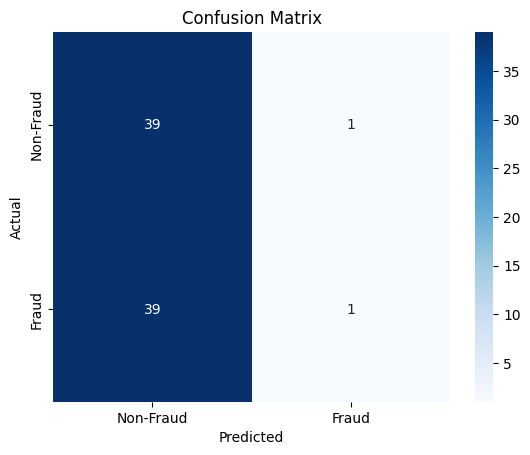

In [ ]:
import os
import torch
import numpy as np
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer, BertModel,
    Trainer, TrainingArguments, EarlyStoppingCallback
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# ‚úÖ Config
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ‚úÖ Load transferred FinBERT encoder
transfer_path = "./finbert-fake-news-encoder"
tokenizer = AutoTokenizer.from_pretrained(transfer_path)
encoder = BertModel.from_pretrained(transfer_path)

# ‚ùÑÔ∏è Freeze encoder weights
for param in encoder.parameters():
    param.requires_grad = False

# ‚úÖ Prepare MD&A data
texts = [s["text"] for s in mdna_samples]
labels = [1 if s["true_label"] == "Fraud" else 0 for s in mdna_samples]
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, stratify=labels, random_state=42
)

# ‚úÖ Define classifier model
class FinBERTMDNAClassifier(torch.nn.Module):
    def __init__(self, encoder):
        super().__init__()
        self.encoder = encoder
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(encoder.config.hidden_size, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(128, 2)
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        with torch.no_grad():  # encoder stays frozen
            outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output, _ = torch.max(outputs.last_hidden_state, dim=1)
        logits = self.classifier(self.dropout(pooled_output))
        loss = None
        if labels is not None:
            class_weights = torch.tensor([1.0, 2.0]).to(logits.device)
            loss = torch.nn.functional.cross_entropy(logits, labels, weight=class_weights)
        return {"loss": loss, "logits": logits}

model = FinBERTMDNAClassifier(encoder).to(device)

# ‚úÖ Tokenization + Chunking
MAX_LEN = 512
def chunk_text(text, label):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=False)
    chunks = []
    for i in range(0, len(tokens), MAX_LEN):
        chunk = tokens[i:i + MAX_LEN]
        chunk += [tokenizer.pad_token_id] * (MAX_LEN - len(chunk))
        chunks.append((chunk, label))
    return chunks

class ChunkedMDNADataset(Dataset):
    def __init__(self, texts, labels):
        self.samples = []
        for text, label in zip(texts, labels):
            self.samples.extend(chunk_text(text, label))

    def __getitem__(self, idx):
        chunk, label = self.samples[idx]
        return {
            "input_ids": torch.tensor(chunk),
            "attention_mask": torch.tensor([1 if t != tokenizer.pad_token_id else 0 for t in chunk]),
            "labels": torch.tensor(label)
        }

    def __len__(self):
        return len(self.samples)

train_dataset = ChunkedMDNADataset(train_texts, train_labels)
val_dataset = ChunkedMDNADataset(val_texts, val_labels)

# ‚úÖ Training setup
training_args = TrainingArguments(
    output_dir="./finbert-mdna-transfer",
    num_train_epochs=4,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    learning_rate=2e-5,
    eval_strategy="steps",
    eval_steps=100,
    save_strategy="steps",
    save_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    logging_steps=10,
    warmup_steps=50,
    weight_decay=0.01,
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ‚úÖ Train classifier head (encoder frozen)
trainer.train()

# ‚úÖ Save
torch.save(model.state_dict(), "./finbert-mdna-transfer/pytorch_model.bin")
tokenizer.save_pretrained("./finbert-mdna-transfer")
print("‚úÖ MD&A fine-tuning complete.")

# ‚úÖ Evaluate with majority voting
def evaluate_with_majority_vote():
    model.eval()
    predictions_by_doc = defaultdict(list)
    true_labels_by_doc = {}

    for idx, (text, label) in enumerate(zip(val_texts, val_labels)):
        chunks = chunk_text(text, label)
        for chunk, lbl in chunks:
            input_ids = torch.tensor([chunk]).to(device)
            attention_mask = torch.tensor([[1 if t != tokenizer.pad_token_id else 0 for t in chunk]]).to(device)
            with torch.no_grad():
                logits = model(input_ids=input_ids, attention_mask=attention_mask)["logits"]
            pred_label = torch.argmax(logits, dim=1).item()
            predictions_by_doc[idx].append(pred_label)
        true_labels_by_doc[idx] = label

    final_preds, final_trues = [], []
    for doc_id in sorted(predictions_by_doc.keys()):
        chunk_preds = predictions_by_doc[doc_id]
        majority = max(set(chunk_preds), key=chunk_preds.count)
        final_preds.append(majority)
        final_trues.append(true_labels_by_doc[doc_id])

    print("üìä Classification Report (Majority Voting):")
    print(classification_report(final_trues, final_preds, target_names=["Non-Fraud", "Fraud"]))

    cm = confusion_matrix(final_trues, final_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Non-Fraud", "Fraud"],
                yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# ‚úÖ Run it
evaluate_with_majority_vote()
